In [ ]:
from numpy.random import seed
seed(42)

import tensorflow
tensorflow.random.set_seed(42)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from google.colab import files

In [7]:
uploaded = files.upload()

Saving ML_GRF_stance_N.csv to ML_GRF_stance_N (1).csv


In [8]:
df = pd.read_csv("ML_GRF_stance_N.csv", header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,3.591,2.30980,1.30420,1.544600,0.99642,-0.86461,-1.8383,-3.34520,-5.4749,-8.6983,...,2.4066,2.31010,2.44570,2.7795,2.54120,2.6060,2.2587,2.8207,3.6663,2.977
1,2.199,0.30152,-0.49052,-0.002909,0.89121,0.30170,-2.7868,-6.95390,-9.0650,-8.6581,...,-2.6806,-1.52520,-0.81006,-1.4067,-0.30921,1.4658,1.6661,2.5326,2.9095,3.889
2,4.317,1.07650,-0.75328,0.764090,-0.55040,-3.91910,-7.3576,-10.71500,-12.6630,-11.4040,...,19.6700,17.28500,13.19600,10.5000,8.78740,7.5012,7.3930,6.2177,5.0284,4.098
3,3.310,0.52531,1.30960,0.409730,-2.29800,-5.33850,-9.7976,-12.07200,-12.3320,-10.2080,...,7.8613,7.05710,6.05990,4.8255,4.89040,5.4780,5.8122,6.0775,3.7969,4.605
4,1.821,-1.24800,-5.39700,-6.074400,-5.49380,-8.26350,-9.4401,-9.57430,-9.1991,-5.4045,...,17.5130,16.00400,13.37500,12.1960,9.85130,10.2140,8.3698,7.0593,6.6789,5.439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15691,-0.434,4.50740,5.93060,-2.600900,-14.79000,-21.28800,-24.8200,-21.49100,-24.4130,-20.9730,...,1.5590,-0.46055,0.12782,3.0011,5.22610,6.6191,7.3697,6.1280,4.3417,2.069
15692,1.164,4.43190,6.86710,-1.672000,-13.79200,-16.55900,-19.6420,-15.64400,-15.9730,-11.9680,...,16.6990,15.46100,14.13000,12.3930,9.90540,11.1470,10.2610,9.6713,7.0213,4.497
15693,4.382,6.59760,10.75200,9.721600,8.98050,1.87340,-6.8512,-11.07200,-13.6950,-13.3810,...,7.4279,4.48850,4.43140,6.7222,9.92060,8.3431,9.4538,8.9652,8.4592,4.879
15694,2.034,4.12090,9.56290,10.201000,4.41000,0.35724,-2.6013,-0.57981,-2.3533,-2.0854,...,12.7620,11.09300,9.80270,10.3710,11.67700,10.8000,10.5260,10.5630,8.7945,5.286


In [9]:
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras import Input, Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt




In [10]:
encoding_dim = 30
input_data = Input(shape=(100,))

# encoded representation of input
encoded = Dense(encoding_dim, activation='tanh')(input_data)
encoded_2 = Dense(200, activation='tanh')(encoded)
encoded_3 = Dense(300, activation='tanh')(encoded_2)
encoded_4 = Dense(encoding_dim, activation='tanh')(encoded_3)
decoded_2 = Dense(200, activation='tanh')(encoded_4)
decoded_1 = Dense(300, activation='tanh')(decoded_2)
x2 = Dense(300, activation='tanh')(decoded_1)
# decoded representation of code 
decoded = Dense(100)(x2)
# Model which take input image and shows decoded images
autoencoder = Model(input_data, decoded)

In [11]:
autoencoder.compile(optimizer='adam', loss='mse')

In [12]:
data = np.array(df)
data.shape

(15696, 100)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(data, test_size=0.2, random_state=2022)

In [14]:
print(X_train.shape)
print(X_test.shape)

(12556, 100)
(3140, 100)


In [15]:
n_epochs = 8000

In [16]:
history = autoencoder.fit(X_train, X_train,
                epochs=n_epochs,
                batch_size=256,
                validation_data=(X_test, X_test),
                         verbose = False)

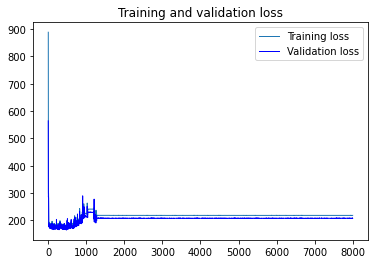

In [17]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(n_epochs)
plt.figure()
plt.plot(epochs, loss, '-', label='Training loss', lw=1)
plt.plot(epochs, val_loss, 'b', label='Validation loss', lw=1)
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.close()

In [ ]:
decoded_data = autoencoder(X_test)

In [ ]:
decoded_data.shape

TensorShape([3140, 100])

## Example 1:

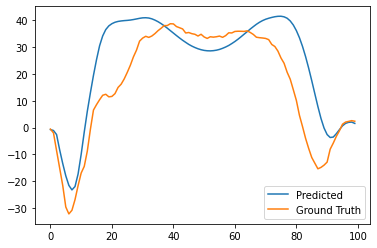

In [ ]:
xx = np.arange(0,100)
plt.plot(xx, decoded_data[0], label="Predicted")
plt.plot(xx, X_test[0], label="Ground Truth")
plt.legend()
plt.show()

## Example 2:

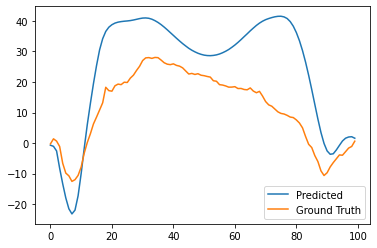

In [ ]:
xx = np.arange(0,100)
plt.plot(xx, decoded_data[1], label="Predicted")
plt.plot(xx, X_test[1], label="Ground Truth")
plt.legend()
plt.show()

## Example 3:

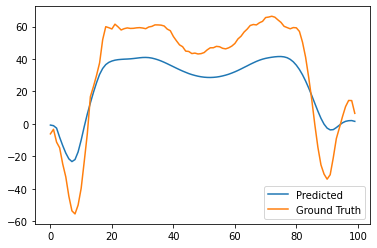

In [ ]:
xx = np.arange(0,100)
plt.plot(xx, decoded_data[2], label="Predicted")
plt.plot(xx, X_test[2], label="Ground Truth")
plt.legend()
plt.show()